## TOPIC : MULTIPLE LINEAR REGRESSION

### NAME : SUKANNA DAS
### CLASS : MSCDSA
### REGISTRATION NO : 23122039

### OBJECTIVE : Building an MLR model to predict car prices based on important features . 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Preprocessing and EDA

In [ ]:
df = pd.read_csv('cardata.csv')

In [ ]:
df.head()

#### Printing the car names 

In [ ]:
print (df.Car_Name)

#### Shape of the dataset

In [ ]:
df.shape

In [ ]:
df.info()

#### Count for the null values in the data

In [ ]:
df.isnull().sum()

#### Determining the types of fuel present and how many cars uses the specific fuels

In [ ]:
df.Fuel_Type.value_counts()

#### Counting the Seller types 

In [ ]:
df.Seller_Type.value_counts()

#### Counting the Transmission types

In [ ]:
df.Transmission.value_counts()

#### Counting the Owner types

In [ ]:
df.Owner.value_counts()

### now we replace the categorical variables with numerical values by providing them  some numerical value for a particular type 

In [ ]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

In [ ]:
df.replace({'Seller_Type':{'Dealer':0,'Individual':1,}},inplace=True)

In [ ]:
df.replace({'Transmission':{'Manual':0,'Automatic':1,}},inplace=True)

In [ ]:
df.head(5)

#### Detrrmining how many types of each cars are present

In [ ]:
df.Car_Name.value_counts()

### PLOTTING THE SELLING PRICE vs  PRESENT PRICE

In [ ]:
fig = plt.figure(figsize=(7,7))
plt.title('Correlation Selling Price and Present Price')
sns.regplot(x='Selling_Price', y='Present_Price', data=df)
plt.show()

In [ ]:
data = df.drop(["Car_Name","Selling_Price"],axis = 1)
y = df['Selling_Price']

### Now we chack wether the input variables have any correlation among themselves or not

In [ ]:
corr_matrix = data.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)

# Add title and labels
plt.title('Correlation Matrix')
plt.show()

## PAIRPLOT

In [ ]:
sns.pairplot(df)

### we split the input dataset into train and test and fit a Lasso Regression model as the Lasso Regression model helps us to know which columns are the relevant ones for predicting our output variable .

### If the coffecient of a particular variable comes as 0 then we take that as irrelevant variable and if it's not equals to 0 then we take that variable as a relevant variable that will help us to predict the output variable . 

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(data,y, test_size = 0.2, random_state=2)

In [ ]:
model1 = Lasso()
model1.fit(x_train1, y_train1)
training_data_prediction1 = model1.predict(x_train1)
err_score1 = metrics.r2_score(y_train1, training_data_prediction1)
print("R Squared Error :", err_score1)
plt.scatter(y_train1, training_data_prediction1)
plt.xlabel('ACTUAL PRICE')
plt.ylabel('PREDICTED PRICES')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [175]:
coefficients = model1.coef_

# Identify and print the relevant columns (non-zero coefficients) and their coefficients
relevant_features = x_train1.columns[coefficients != 0]
relevant_coefficients = coefficients[coefficients != 0]

print("Selected features and their coefficients:")
for feature, coefficient in zip(relevant_features, relevant_coefficients):
    print(f"Feature: {feature}, Coefficient: {coefficient}")


Selected features and their coefficients:
Feature: Year, Coefficient: 0.34443882716670443
Feature: Present_Price, Coefficient: 0.5080372884647286
Feature: Kms_Driven, Coefficient: -6.145817815630814e-06


### So according to the Lasso Regression we got our most relevant columns - 'Year', 'Present_Price'

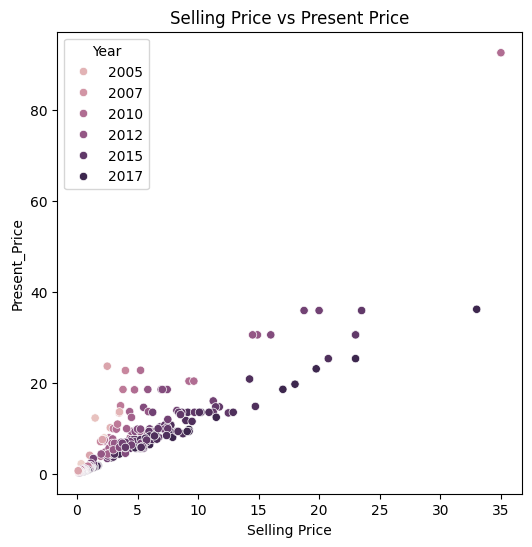

In [176]:
plt.figure(figsize=(6,6))
plt.title('Selling Price vs Present Price')
sns.scatterplot(x=df['Selling_Price'],y=df['Present_Price'], hue=df['Year'])
plt.xlabel('Selling Price')
plt.ylabel('Present_Price')
plt.show()

### Thereafter we take a new input variable dataset that is denoted by x and the output variable remains as it was .

In [177]:
x = df.drop(['Car_Name','Selling_Price','Fuel_Type','Seller_Type','Transmission','Owner','Kms_Driven'],axis=1)
y = df.Selling_Price

In [178]:
# Assuming X_train is a DataFrame containing predictor variables and y_train is a Series containing the target variable

# Calculate correlation coefficients
correlation_coefficients = x.corrwith(y)

print("Correlation coefficients:")
print(correlation_coefficients)


Correlation coefficients:
Year             0.236141
Present_Price    0.878983
dtype: float64


In [179]:
x

,Year,Present_Price
0,2014,5.59
1,2013,9.54
2,2017,9.85
3,2011,4.15
4,2014,6.87
...,...,...
296,2016,11.60
297,2015,5.90
298,2009,11.00
299,2017,12.50


In [180]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

### Splitting the dataset x and y (i.e input and output)

In [181]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x,y, test_size = 0.2, random_state=2)

Model Training

In [182]:
model2 = LinearRegression()

In [183]:
model2.fit(x_train2, y_train2)

LinearRegression()

In [184]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,root_mean_squared_error

In [185]:
y_pred2 = model2.predict(x_test2)

# Calculate evaluation metrics
mae2 = mean_absolute_error(y_test2, y_pred2)
mse2 = mean_squared_error(y_test2, y_pred2)


print(f"Mean Absolute Error (MAE): {mae2}")
print(f"Mean Squared Error (MSE): {mse2}")




Mean Absolute Error (MAE): 1.2394650282562432
Mean Squared Error (MSE): 2.7407721699765433


## MSE (Mean Squared Error = 2.73):

### * Magnitude: The MSE value of 2.73 suggests that, on average, the squared differences between the observed actual outcomes and the predictions are 2.74. Because this metric squares the errors, it penalizes larger errors more heavily.
### * Outlier Sensitivity: A higher MSE compared to MAE indicates that some of your errors might be relatively large, as squaring larger errors has a more significant effect on the final value.
### * Smoothness: Since MSE is more sensitive to large deviations, it might be indicating some model predictions that are further off from the actual values.


## MAE (Mean Absolute Error = 1.23):

### * Magnitude: The MAE value of 1.23 suggests that, on average, the absolute differences between the observed actual outcomes and the predictions are 1.23. This gives a straightforward interpretation of how much your predictions deviate from actual values, on average.
### * Outlier Robustness: MAE is less sensitive to outliers compared to MSE. The relatively lower MAE indicates that most of your errors are small, but there could still be a few larger errors affecting the MSE.
### * Direct Interpretability: Since MAE maintains the same units as the original data, it tells you that, on average, your predictions are off by about 1.23 units from the actual values.

In [186]:
training_data_prediction2 = model2.predict(x_train2)

### The R-squared (R²) value is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

In [187]:
err_score = metrics.r2_score(y_train2, training_data_prediction2)
print("R Squared Error :", err_score)

R Squared Error : 0.8495921529106859


### * An R² of 0.8496 indicates that about 85% of the variability in car prices can be explained by the features included in the model (e.g., Year , Kms_Driven and Present_Price).
### * This suggests that your model is quite good at explaining the variation in car prices based on the given predictors.(for this training dataset).

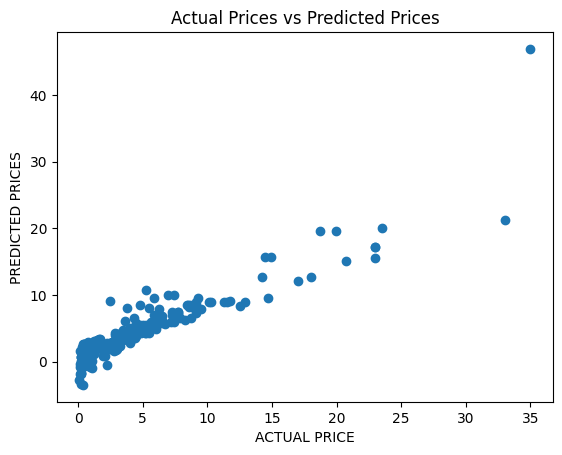

In [188]:
plt.scatter(y_train2, training_data_prediction2)
plt.xlabel('ACTUAL PRICE')
plt.ylabel('PREDICTED PRICES')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

## Predicting the test data

In [189]:
test_data_prediction2 = model2.predict(x_test2)

In [190]:
err_score2= metrics.r2_score(y_test2, test_data_prediction2)
print("R Squared Error :", err_score2)

R Squared Error : 0.8507731914526676


## For Test Dataset
### Here also the R-squared values indicates that the model  is quite good at explaining the variation in car prices based on the given predictors.

### The R- squared values has also been increased compared to the training dataset

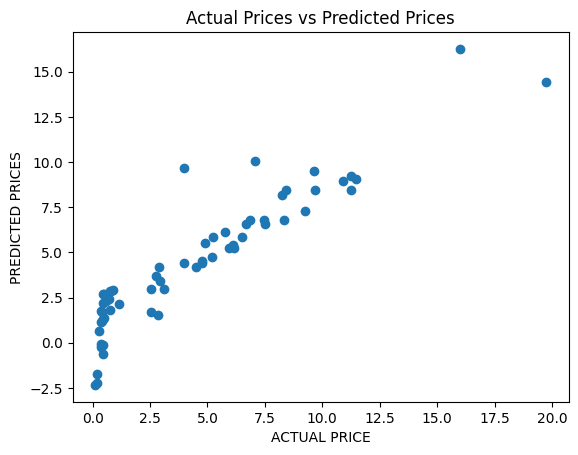

In [191]:
plt.scatter(y_test2, test_data_prediction2)
plt.xlabel('ACTUAL PRICE')
plt.ylabel('PREDICTED PRICES')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

### We will check now wether the error is normally distributed and have mean 0 .

In [192]:
residual = pd.DataFrame(y_test2-test_data_prediction2)
residual

,Selling_Price
99,0.170114
161,-0.876482
89,0.347569
30,0.111338
232,2.380412
...,...
172,-0.830067
94,-5.678217
160,0.573413
199,2.454103


C:\Users\SUKANNA DAS\AppData\Local\Temp\ipykernel_6704\1108040850.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual)


<Axes: ylabel='Density'>

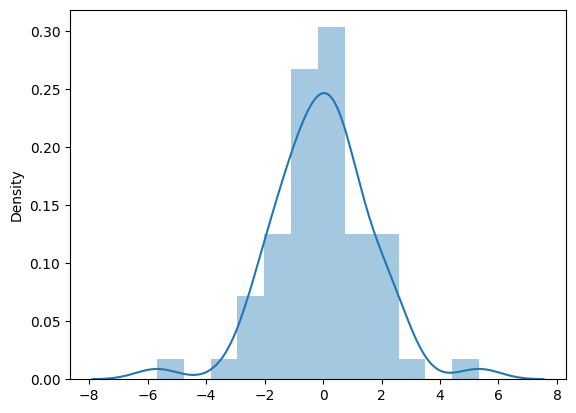

In [193]:
sns.distplot(residual)

## Shapiro wilk test :

### The Shapiro-Wilk test is used to test the null hypothesis that a sample comes from a normally distributed population. 

In [194]:
import scipy.stats as stats



stat, p_value = stats.shapiro(residual)

print(f'Statistic: {stat}')
print(f'P-value: {p_value}')

# Interpreting the result

alpha = 0.05
if p_value > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


Statistic: 0.9672313928604126
P-value: 0.10131154954433441
Sample looks Gaussian (fail to reject H0)


In [195]:
residual.mean()

Selling_Price   -0.017333
dtype: float64

### The mean of errors is also 0 . 

## Lag plot
### It is  useful tools for detecting autocorrelation, which is the correlation between observations at different time points in time series data or between residuals in regression analysis. The significance of lag plots lies in their ability to visually reveal patterns or structures in the data that indicate the presence of autocorrelation.

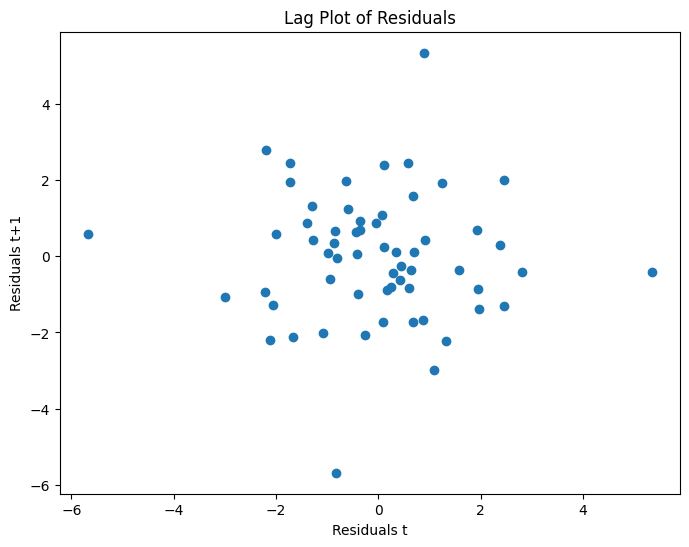

In [196]:
import pandas as pd
import matplotlib.pyplot as plt



# Create lag plot
plt.figure(figsize=(8, 6))
pd.plotting.lag_plot(residual, lag=1)
plt.xlabel('Residuals t')
plt.ylabel('Residuals t+1')
plt.title('Lag Plot of Residuals')
plt.show()


### Since no pattern exists here between the residuals or errors ,
#### * so we can say that the errors are independent to one another ,
#### * Also we can say that the residuals have constant variance (Homoschedastic)



### Based on the model, both Year and Present_Price are significant predictors of car selling prices. The coefficients associated with these variables indicate the direction and magnitude of their impact on car prices.With an R-squared value of 0.85, the  MLR model is effective in predicting car prices based on the provided predictor variables. This implies that Year and Present_Price are important factors in determining car prices, and the model captures their relationships with the target variable reasonably well.